# Lets explore the lyrics of the SFA songs and albums 

In [1]:
import pandas as pd
import string

Lets read in the data and use Pandas to get a summary

In [6]:
lyrics = pd.read_csv("data/SFALyrics.csv", dtype=str)
lyrics = lyrics[['lyrics', 'title', 'album']]
lyrics = lyrics[pd.notnull(lyrics['title'])]
lyrics['lyrics_no_newline'] = lyrics['lyrics'].replace('\n',' ', regex=True)
lyrics.loc[lyrics['album'] == 'Dark Day/Light Years', 'album'] = 'Dark Days/Light Years'
lyrics.loc[lyrics['album'] == 'Gorilla', 'album'] = 'Guerilla'
lyrics.head()

lyrics.groupby('album').count()

,lyrics,title,lyrics_no_newline
album,,,
Dark Days/Light Years,10,10,10
Fuzzy Logic,12,12,12
Guerilla,11,11,11
Hey! Venus,6,6,6
Love Kraft,11,11,11
Phantom Power,12,12,12
Radiator,10,10,10
Rings around the World,11,11,11


lets create our own functions to remove white space and punctuation, and also find unique words.

In [7]:
def clean(text):
    # split into words by white space
    words = str(text).lower().split()
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    return stripped

def unique_words(text):
    unique_words = set()
    for word in text:

        unique_words.add(word)
    return list(unique_words)   

Clean the lyrics and get a count of the unique words

In [8]:
lyrics['lyrics_cleaned'] =  lyrics['lyrics_no_newline'].apply(clean)
lyrics['unique_words'] =  lyrics['lyrics_cleaned'].apply(unique_words)
lyrics['unique_num'] = lyrics['unique_words'].apply(len)
lyrics.head()

,lyrics,title,album,lyrics_no_newline,lyrics_cleaned,unique_words,unique_num
0,I had a soul transplant operation \nCoz my byp...,God! How me magic,Fuzzy Logic,I had a soul transplant operation Coz my bypa...,"[i, had, a, soul, transplant, operation, coz, ...","[show, your, hamsters, keeping, magic, nice, s...",43
1,"[Bunf:] \nHamster, turnin' round in your wheel...",Fuzzy Birds,Fuzzy Logic,"[Bunf:] Hamster, turnin' round in your wheel ...","[bunf, hamster, turnin, round, in, your, wheel...","[your, electricity, feelings, turning, wheel, ...",76
2,"First time, I did it for the hell of it \nStuc...",Something 4 the weekend,Fuzzy Logic,"First time, I did it for the hell of it Stuck...","[first, time, i, did, it, for, the, hell, of, ...","[heard, swallowed, frighten, just, is, were, k...",98
3,Locked in a sorry dream \nYou know we're drown...,Frisbee,Fuzzy Logic,Locked in a sorry dream You know we're drowni...,"[locked, in, a, sorry, dream, you, know, were,...","[your, pizzas, sorry, nice, were, cream, is, p...",60
4,I was lost \nLost on the bypass road \nCould b...,Hometown Unicorm,Fuzzy Logic,I was lost Lost on the bypass road Could be ...,"[i, was, lost, lost, on, the, bypass, road, co...","[turned, frankie, back, return, born, just, be...",47


In [5]:
lyrics.sort_values(by=['unique_num'], ascending=False, inplace=True)

Plot the songs with the most and least unique words

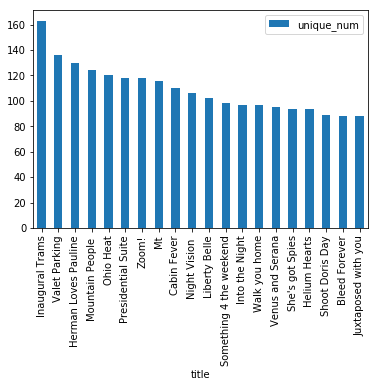

In [6]:
%matplotlib inline
lyrics.head(20).plot.bar(x='title', y='unique_num', rot=90)

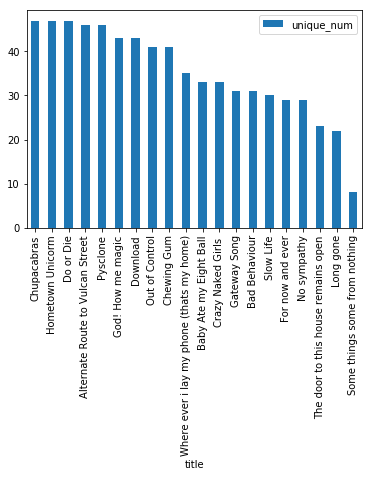

In [7]:
lyrics.tail(20).plot.bar(x='title', y='unique_num', rot=90)

Lets view this as a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a155bfb70>]],
      dtype=object)

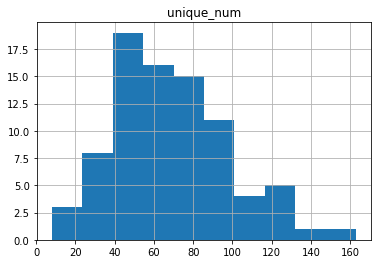

In [8]:
lyrics.hist()

Now lets look at the distribution of unique words in a song by album

[Text(0,0,'Fuzzy Logic'),
 Text(0,0,'Radiator'),
 Text(0,0,'Guerilla'),
 Text(0,0,'Phantom Power'),
 Text(0,0,'Love Kraft'),
 Text(0,0,'Hey! Venus'),
 Text(0,0,'Dark Days/Light Years')]

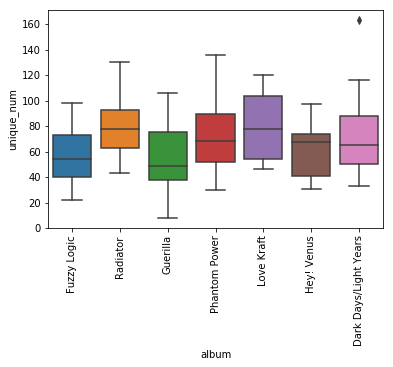

In [15]:
# Lets add album year so we can order the plot

album = ['Dark Days/Light Years','Phantom Power', 'Radiator', 'Love Kraft',' Rings around the World','Guerilla','Fuzzy Logic', 'Hey! Venus']
year = [ 2009 , 2003, 1997, 2005, 2001, 1999, 1996, 2007]
d = {'album' : album, 'year': year}
disc_df = pd.DataFrame(data = d)

lyrics_2_df = lyrics.merge(disc_df, on='album').sort_values(by=['year'])

# Plotting the distribution of unique lyrics by album

import seaborn as sns

j = lyrics_2_df[['album', 'title', 'unique_num']]

g = sns.boxplot( x=j["album"], y=j["unique_num"])
g.set_xticklabels(g.get_xticklabels(), rotation=90)